# Import important Liberaries and Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import describe
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler, minmax_scale


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"F:\Desktop\ML DSA\DataScience\FeatureEngineering\Obesity Data\Data\train.csv")
train = data.drop('id',axis=1)
data = pd.read_csv(r"F:\Desktop\ML DSA\DataScience\FeatureEngineering\Obesity Data\Data\test.csv")
test = data.drop('id',axis=1)
Origin = pd.read_csv(r"F:\Desktop\ML DSA\DataScience\FeatureEngineering\Obesity Data\Data\Origin_Data.csv")

In [3]:
print(f"Train data have {train.shape[1]} columns and {train.shape[0]} rows")
print(f"Origin data have {Origin.shape[1]} columns and {Origin.shape[0]} rows")
print(f"Test data have {test.shape[1]} columns and {test.shape[0]} rows")

Train data have 17 columns and 20758 rows
Origin data have 17 columns and 2111 rows
Test data have 16 columns and 13840 rows


In [4]:
# Lets concart train and origin data
df = pd.concat([train,Origin])
df.shape

(22869, 17)

## Quick overview of Data

In [5]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
test.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
5,Male,19.799054,1.844751,59.605028,yes,yes,2.000000,4.000000,Sometimes,no,2.722063,no,2.000000,1.283673,no,Automobile
6,Male,18.000000,1.728834,51.442293,yes,yes,1.202075,3.000000,Sometimes,no,1.087166,no,0.788585,1.000000,Sometimes,Public_Transportation
7,Male,20.000000,1.810000,80.000000,yes,yes,2.000000,3.000000,Always,no,2.000000,no,3.000000,0.000000,no,Automobile
8,Male,21.000000,1.700000,80.000000,yes,yes,2.000000,3.000000,Frequently,yes,2.000000,no,0.000000,2.000000,no,Public_Transportation
9,Female,21.000000,1.560000,53.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,Sometimes,Public_Transportation


## 1.1 Summary of Data

In [7]:
def summary(x):
    summ = pd.DataFrame(x.dtypes, columns=['data type'])
    summ['#missing'] = x.isnull().sum().values
    summ['Duplicate'] = x.duplicated().sum()
    summ['#unique'] = x.nunique().values
    desc = pd.DataFrame(x.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ

In [8]:
summary(df).style.background_gradient(vmax=75, cmap="Blues")

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Gender,object,0,24,2,nan,nan,nan,nan,Female,11465
Age,float64,0,24,1739,14.000000,61.000000,23.885263,5.753419,nan,nan
Height,float64,0,24,1862,1.450000,1.980000,1.700377,0.087881,nan,nan
Weight,float64,0,24,2014,39.000000,173.000000,87.767610,26.364243,nan,nan
family_history_with_overweight,object,0,24,2,nan,nan,nan,nan,yes,18740
FAVC,object,0,24,2,nan,nan,nan,nan,yes,20848
FCVC,float64,0,24,975,1.000000,3.000000,2.443428,0.533329,nan,nan
NCP,float64,0,24,740,1.000000,4.000000,2.754344,0.712711,nan,nan
CAEC,object,0,24,4,nan,nan,nan,nan,Sometimes,19294
SMOKE,object,0,24,2,nan,nan,nan,nan,no,22580


Acording to this sample of data
- Ranges 
    1. Age: From 14 to 61
    2. Height: From 1.45 to 1.98
    3. Weight: From 39 to 173
    4. FCVC: From 1 to 3
    5. NCP: From 1 to 4
    6. CH20: From 1 to 3 
    7. FAF: From 0 to 3
    8. TUE: From 0 to 2

1. We have total 17 Columns 
2. Out of 17 Columns, 8 are float values and 9 columns are object type
3. We don't have any missing values in our data

# Exploratry Data Analysis 
1. univariate Analysis
2. bivariate Analysis
3. multivariate  Analysis

In [9]:
num_columns = [feature for feature in df.columns if df[feature].dtype !='O']
cat_columns = [feature for feature in df.columns.drop("NObeyesdad") if df[feature].dtype=='O']

### Traget Variable 

In [10]:
def showplot(column):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax = ax.flatten()
    value_counts = df[column].value_counts()
    label = value_counts.index.tolist()
    #colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']

    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct = '%1.1f%%', textprops = {'size':8, 'color':'white', 'fontweight':'bold'}, colors = sns.color_palette('viridis'),
        wedgeprops=dict(width=0.6,edgecolor='w'),startangle = 80, pctdistance = 0.85
        )
    center_circ = plt.Circle((0,0),0.7,fc='white')
    ax[0].add_artist(center_circ)

    #Count Plot
    sns.countplot(data = df, y=column, ax = ax[1], palette='viridis', order=label)
    for i, v in enumerate(value_counts):
        ax[1].text(v+1,i,str(v),color='black',fontsize =10, va='center')

    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9, color='black')
    ax[1].set_ylabel(None)
    plt.xlabel(" ")
    plt.xticks([])
    fig.suptitle(column, fontsize=15, fontweight='bold')
    plt.tight_layout(rect = [0, 0, 0.85, 1])
    plt.show()

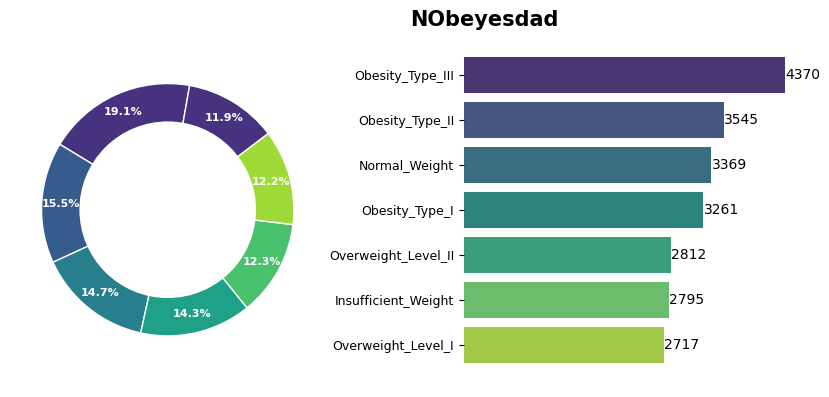

In [11]:
showplot("NObeyesdad")

* We have highest number of people with **Obesity_Type_3** with **19.1%**

### 1. univariate
we will first peroform analysis over cat columns:- 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'

1.1 Gener

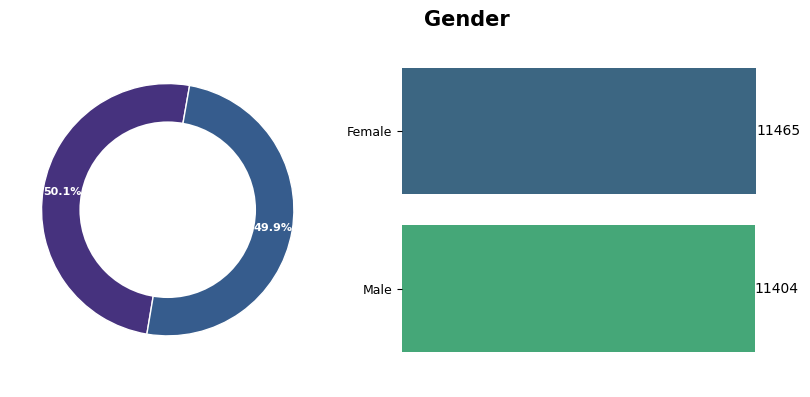

In [12]:
showplot('Gender')

* We have farely equal distribution of **Gender** in our data

1.2 family_history_with_overweight

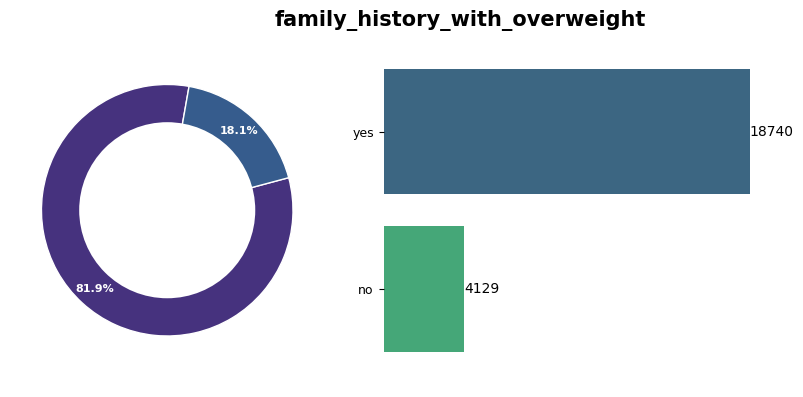

In [13]:
showplot("family_history_with_overweight")

* **82%** people have a family history with overweight but as of now we can't assume anything out of it, to understand it's effect we have explore this feature further 

1.3 'FAVC'

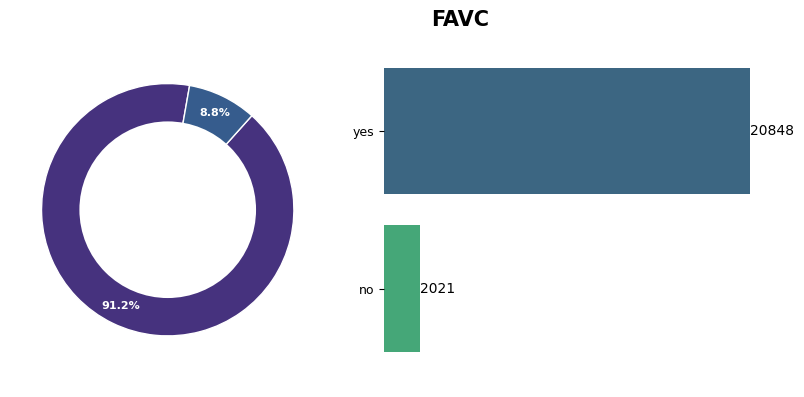

In [14]:
# FAVC --> Frequent consumption of high caloric food
showplot("FAVC")

* Almost **91%** of people have frequent consumption of high caloric food

1.4 "CAEC"

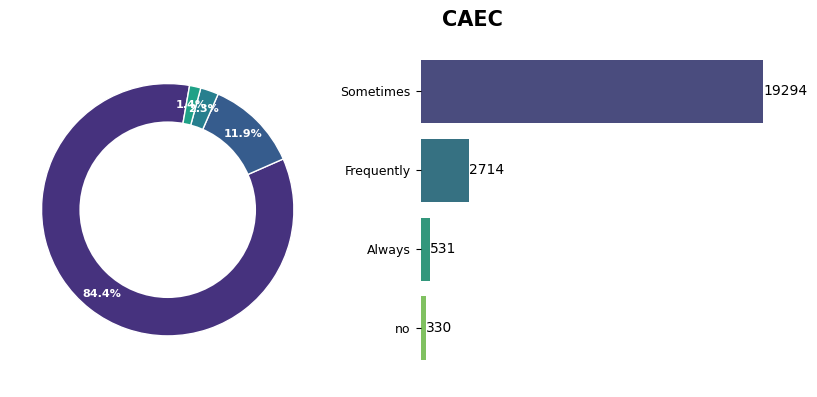

In [15]:
# CAEC --> Consumption of food between meals
showplot('CAEC')

- Almost ~**84.5%** of people have sometimes consumed food in b/w meals 
- And ~**12%** of people frequntly consumed food in b/w meal
- **1.4** says no to food in b/w meal

1.5 'SMOKE'

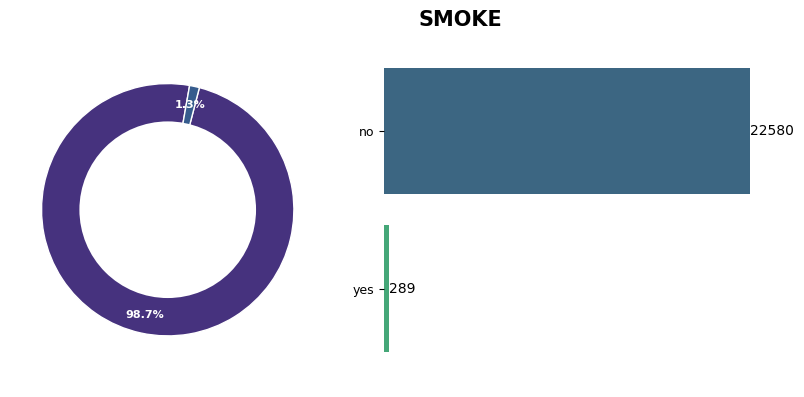

In [16]:
showplot('SMOKE')

- ***~99%*** say they don't smoke, this data does not feel right

1.6 'SCC'

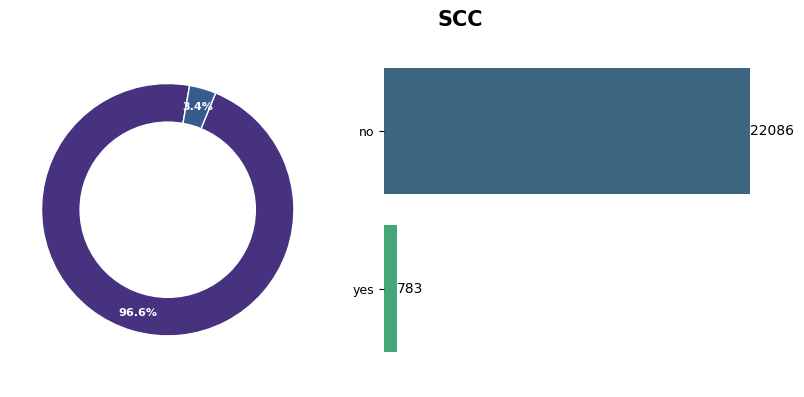

In [17]:
# SCC --> Monitoring of calories consumption
showplot('SCC')

* **96.5%** don't monitor their calories consumotion

1.7 'CALC'

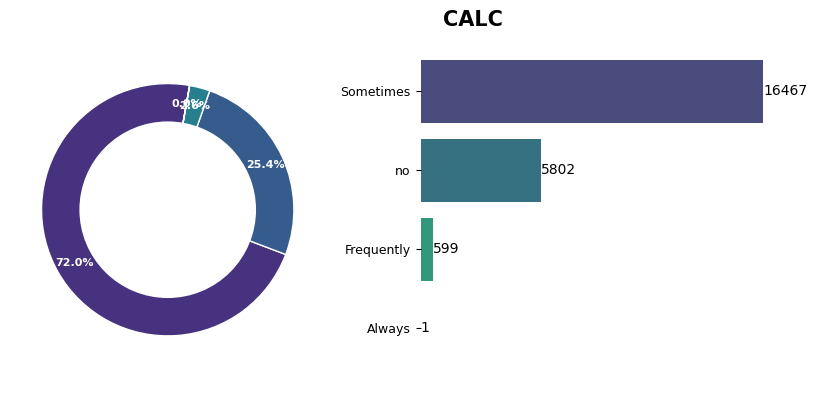

In [18]:
# CALC --> Consumption of alcoho
showplot('CALC')

* **72%** of people consume alcohole sometimes where as **25%** don't consume alcohole

1.8 MTRANS

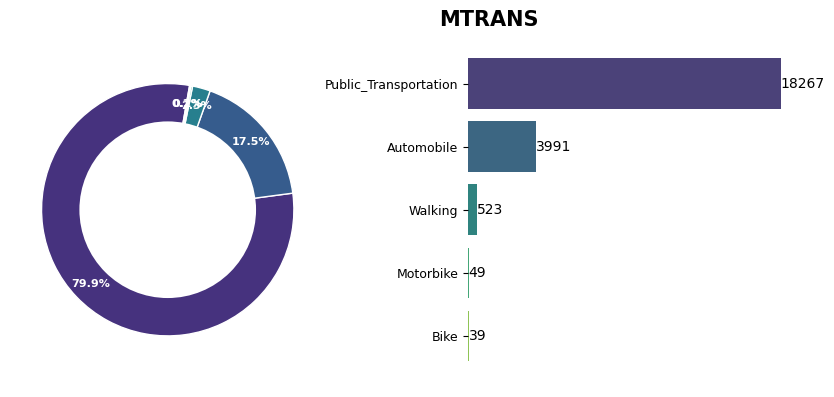

In [19]:
showplot('MTRANS')

* Majority of people **~80%** preffer Public Transportation
* **~2.4%** people preffer walking and **97.5%** useing some form of vehicle

Now we will perform analysis over numerical features :- 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'

In [20]:
def dist_columns(column):
    fig, ax = plt.subplots(2, 4, figsize=(20, 10))
    ax = ax.flatten()

    for i, data in enumerate(column):
        sns.kdeplot(df[data], ax = ax[i], fill = True, alpha = 0.8, color="#0c78eb")
        ax[i].set_title(data+' skewness is '+str(round(df[data].skew(axis=0,skipna=True),2)))

    plt.show()
    

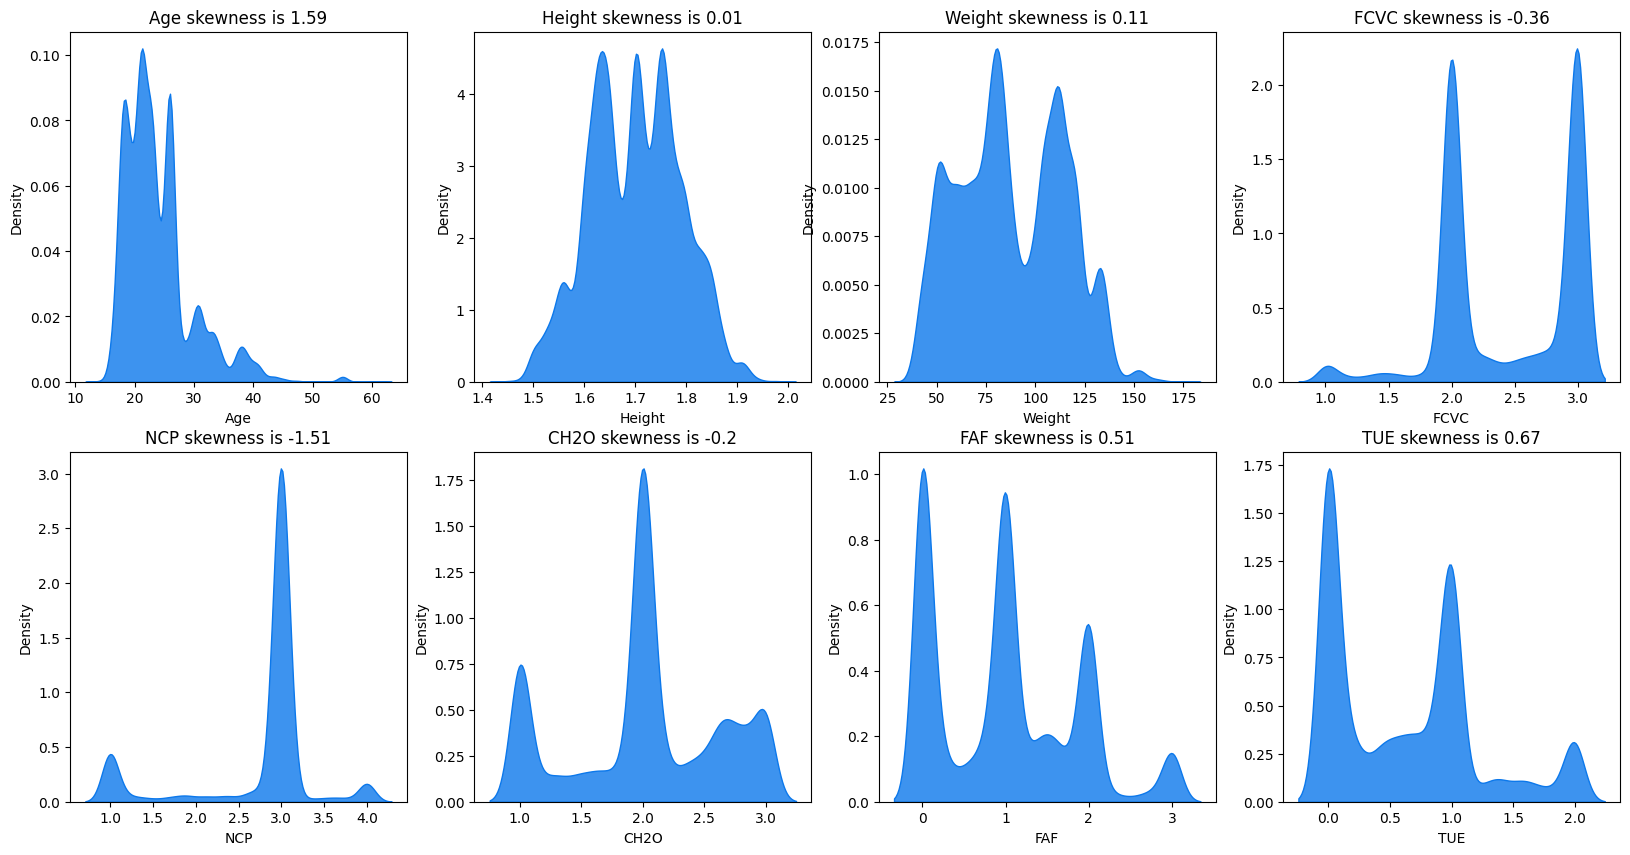

In [21]:
dist_columns(num_columns)

* **Height** and **Weight** are nomally distributed with some skewness 
* **Age** is right skewed

In [22]:
def prob_plot(column):
    fig, ax = plt.subplots(2, 4, figsize=(20, 10))
    ax = ax.flatten()

    for i, data in enumerate(column):
        fig.add_subplot(2,4,i+1)
        stats.probplot(df[data],plot=plt)
        plt.title(f"Q-Q plot for {data}")
        plt.show

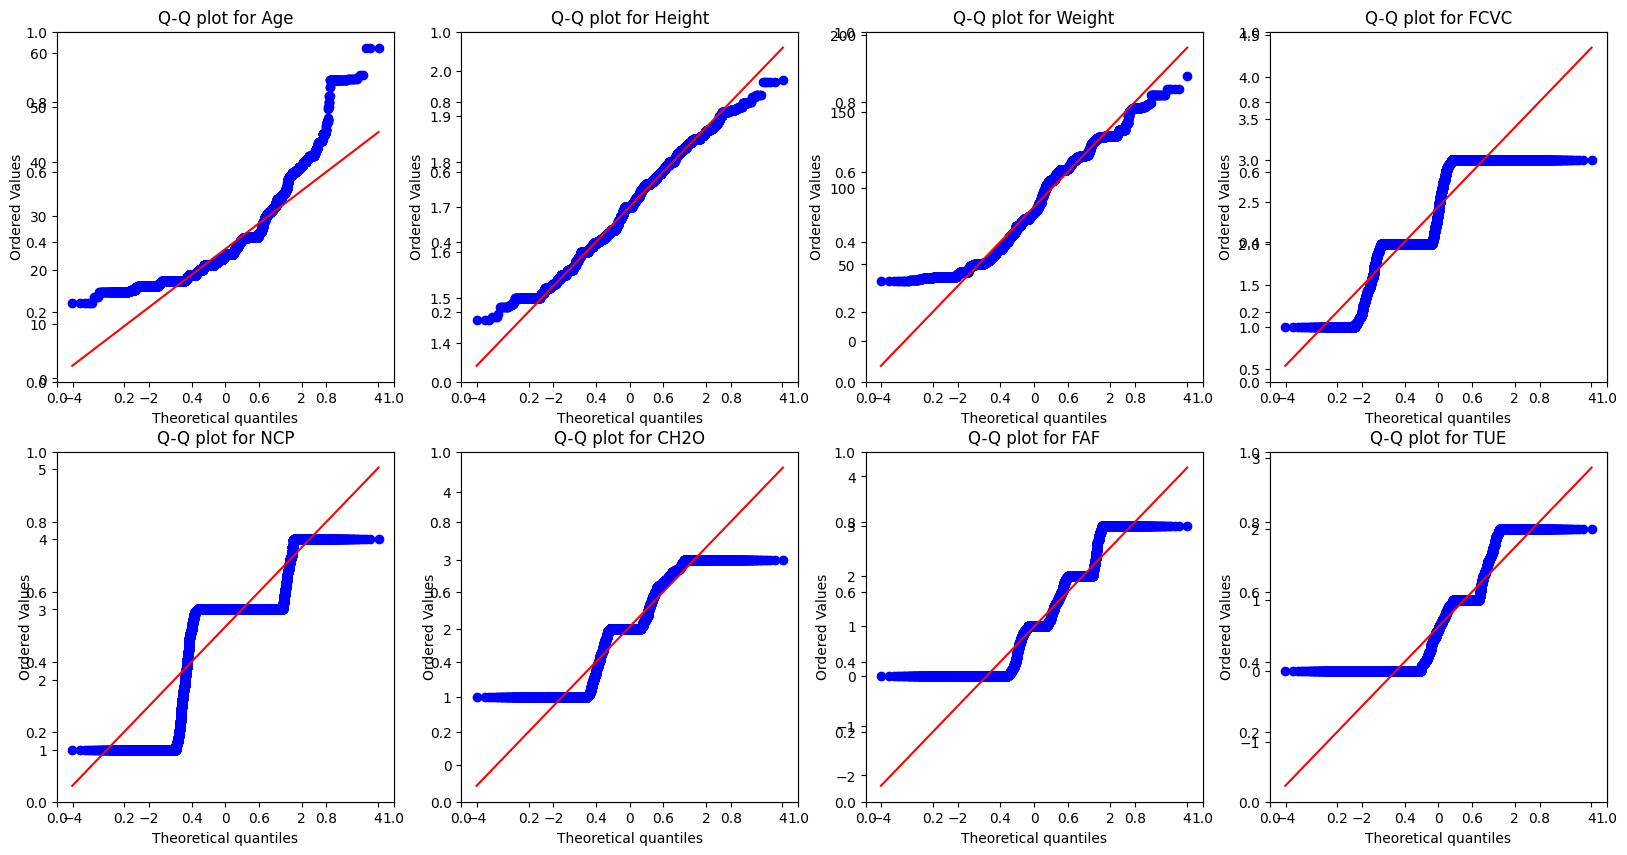

In [23]:
prob_plot(num_columns)

In [24]:
def IQR(x):
    Q1 = np.percentile(x,25)
    Q3 = np.percentile(x,75)

    iqr = Q3-Q1

    lower_bound = round(Q1-(1.5*iqr),2)
    upper_bound = round(Q3+(1.5*iqr),2)

    return lower_bound, upper_bound

def box_plot(column):
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677','#a66aeb']
    fig, ax = plt.subplots(2, 4, figsize=(20, 15))
    ax = ax.flatten()

    for i, data in enumerate(column):
        lower, upper = IQR(df[data])
        sns.boxplot(data = df, y = data, ax = ax[i],color = colors[i] )
        ax[i].set_title(f"from {lower} to {upper}")
        plt.show

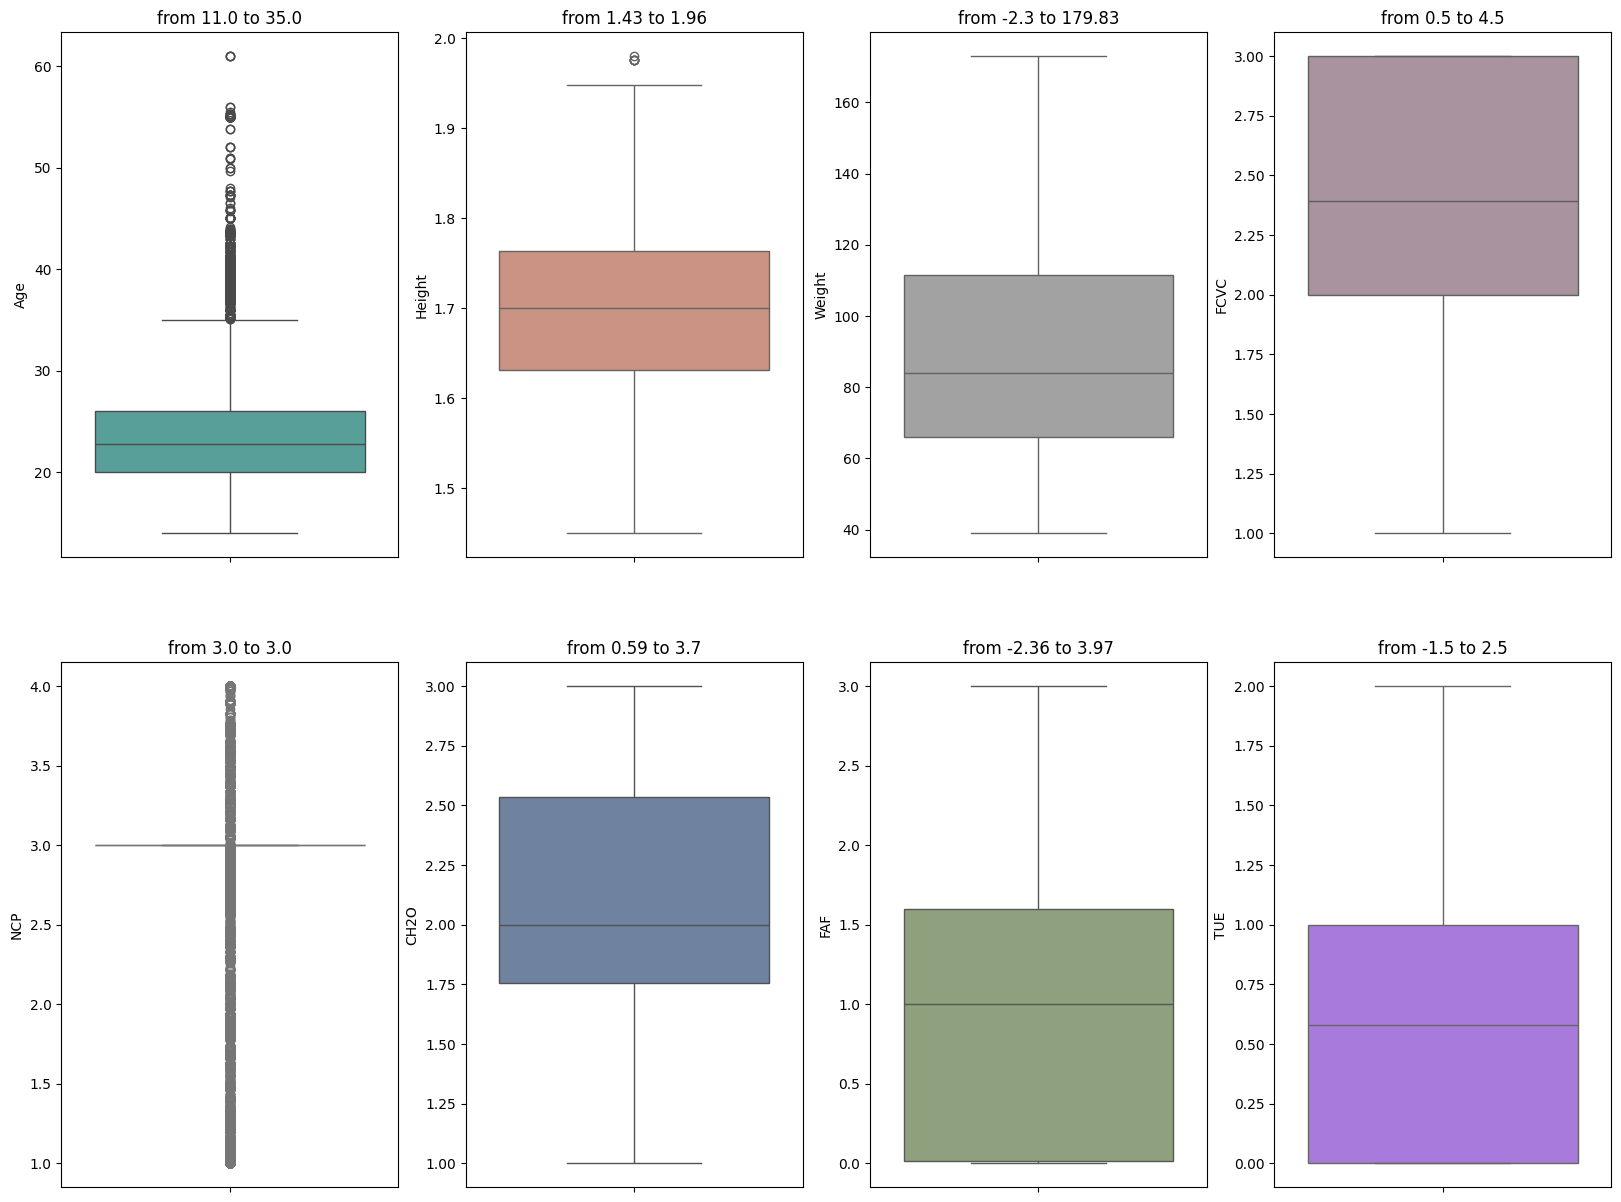

In [25]:
box_plot(num_columns)

* **Age** and **Height** have some outliers
* Rest of the features don't have outliers

### 2. Bivariate Analysis

In [26]:
def show_box_plot(data, columns,target):
    sns.set_style='white'

    for i, feature in enumerate(columns):
        fig=plt.figure(figsize=(15,5))
        sns.boxplot(data=data,y=feature,x=target,palette='flare')
        plt.title(f"{feature} and {target}")
        plt.show()

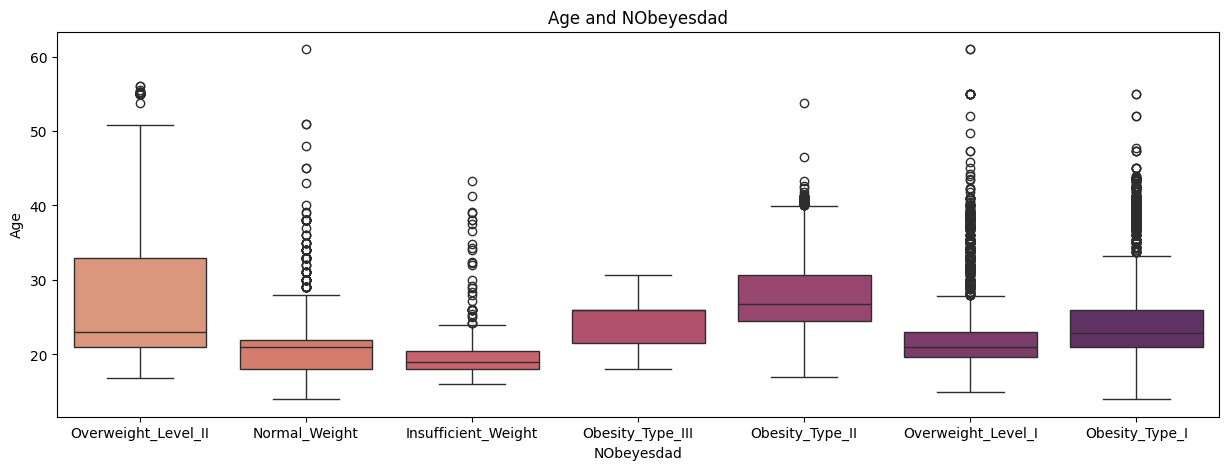

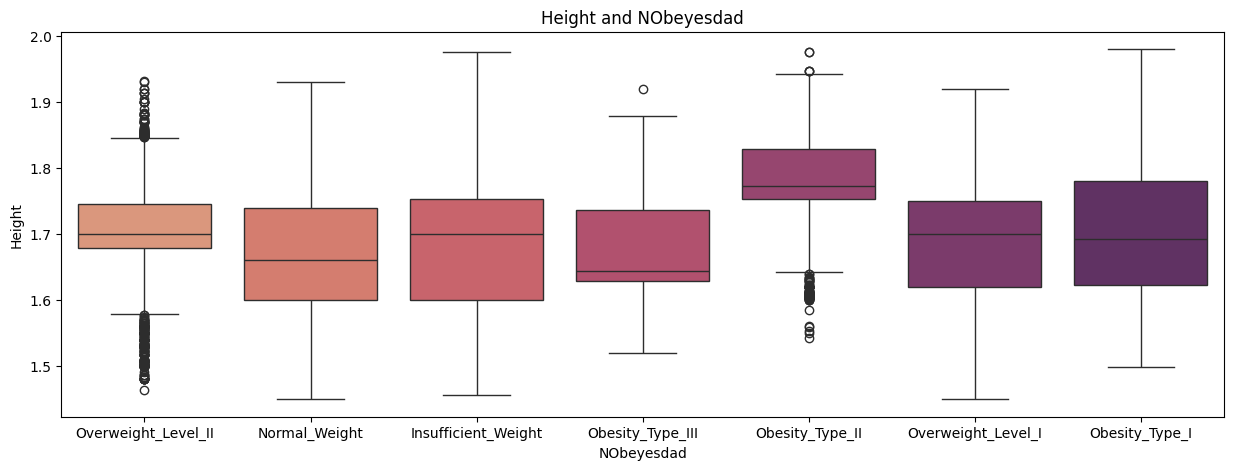

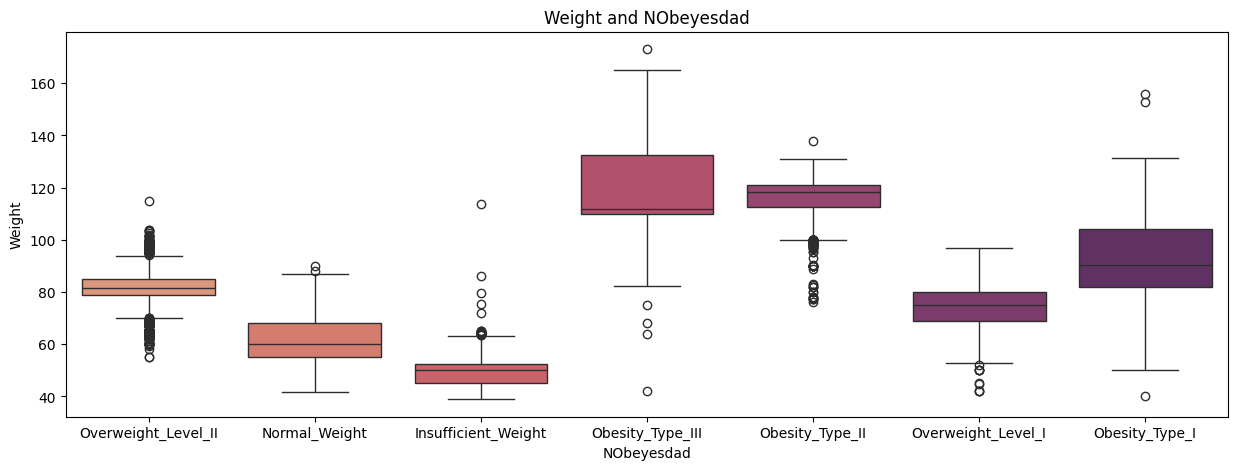

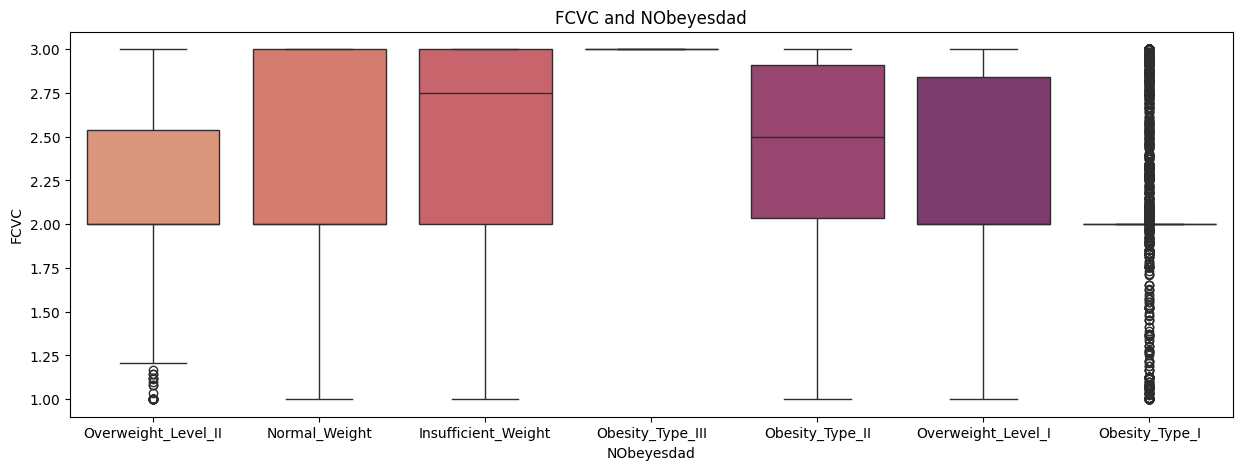

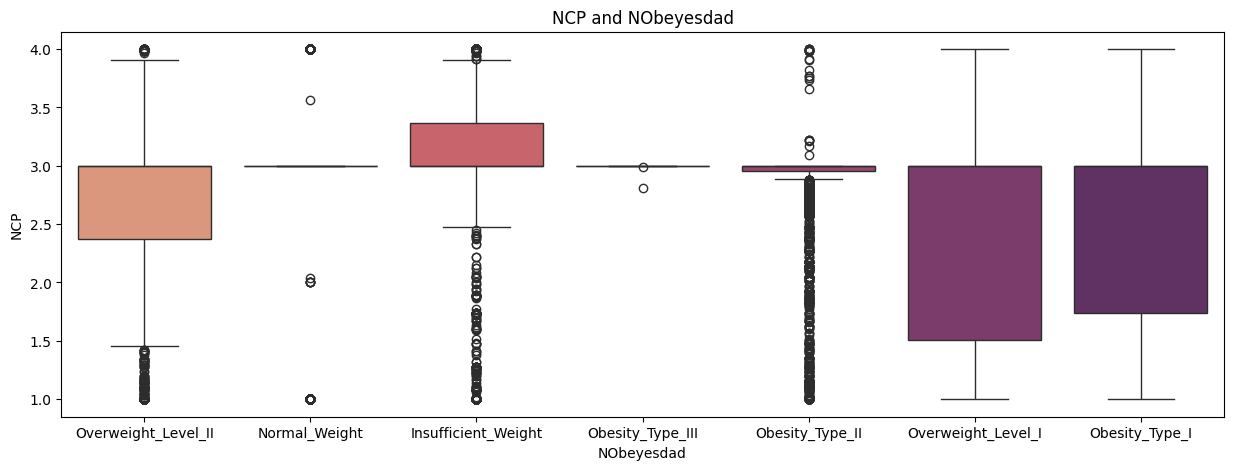

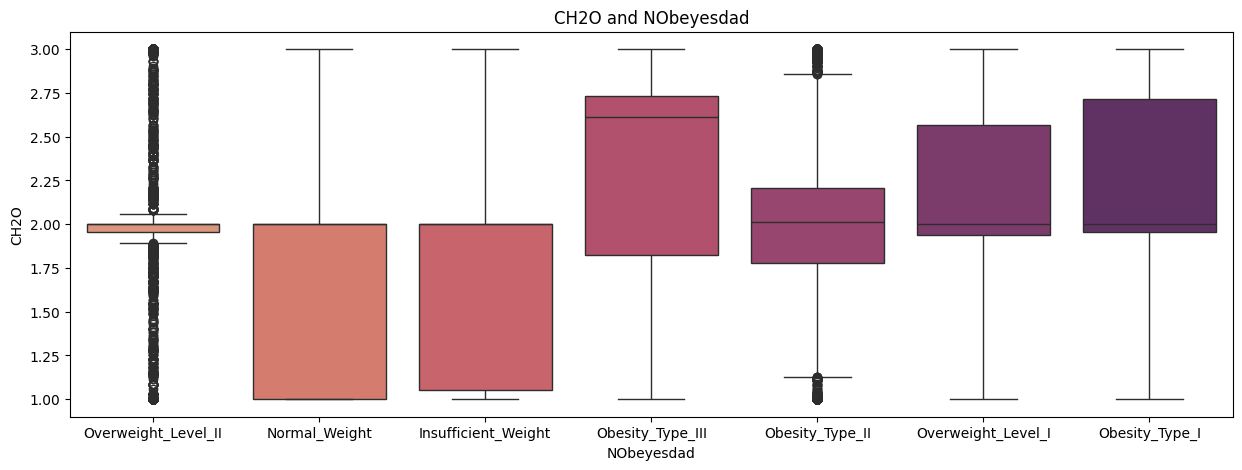

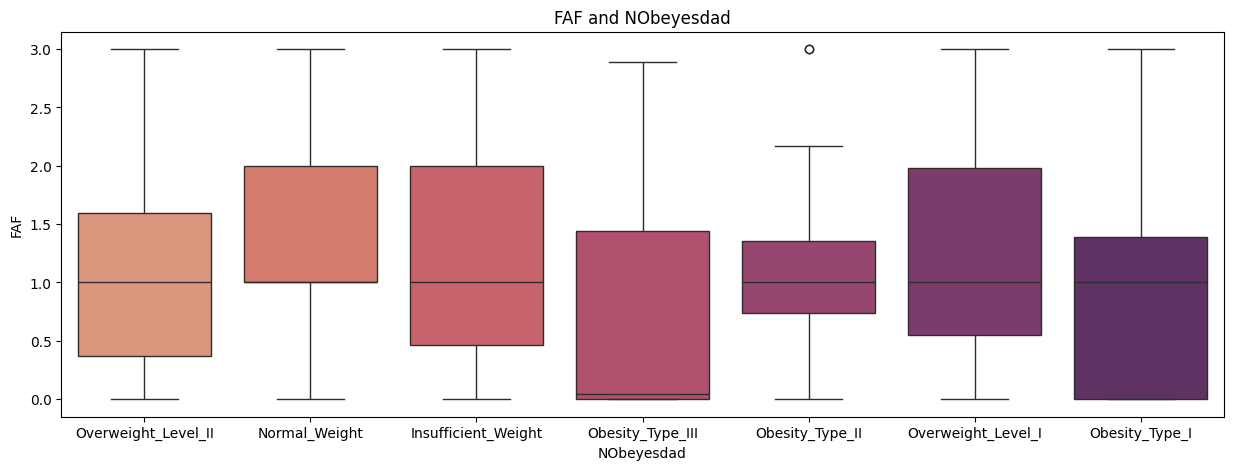

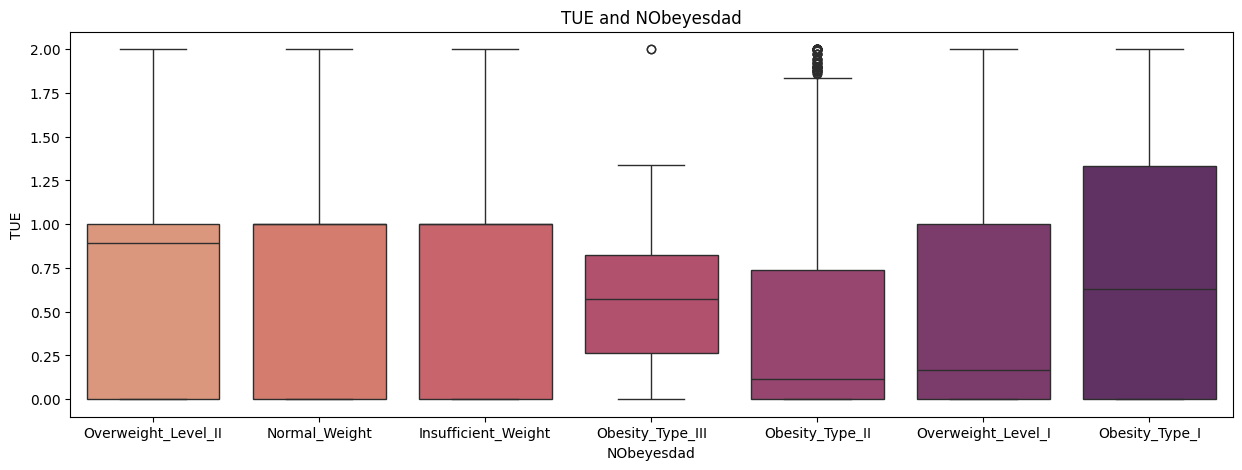

In [27]:
show_box_plot(df,num_columns,'NObeyesdad')

* Person in **Normal_weight** and **Insufficient_weight** are mostly **below age of 30**
* People in **Obesity type 3** are mostly between **20 and 35** of age
* The **average height** of people can be seen around **1.7m** 
* Direct relation between type of obesity and height can no be figured out
* As the weight is increasing Obesity level can be seen increasing
* We can say here we have +ve relation 

In [28]:
def show_dist(column):
    sns.set_style='white'
    fig=plt.figure(figsize=(10,5))
    sns.kdeplot(data=df, x=column, hue="Gender",
                    fill=True, common_norm=False,
                    alpha=.5, linewidth=0
                    ,)
    plt.title(f"distribution plot of {column}")
    plt.show()

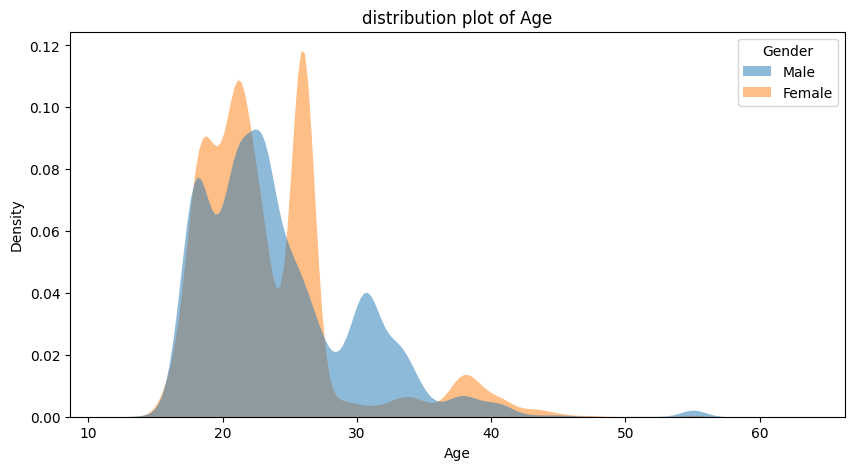

In [29]:
show_dist('Age')

* Distribution is right skewed 
* Average age is in between 20-23 for both

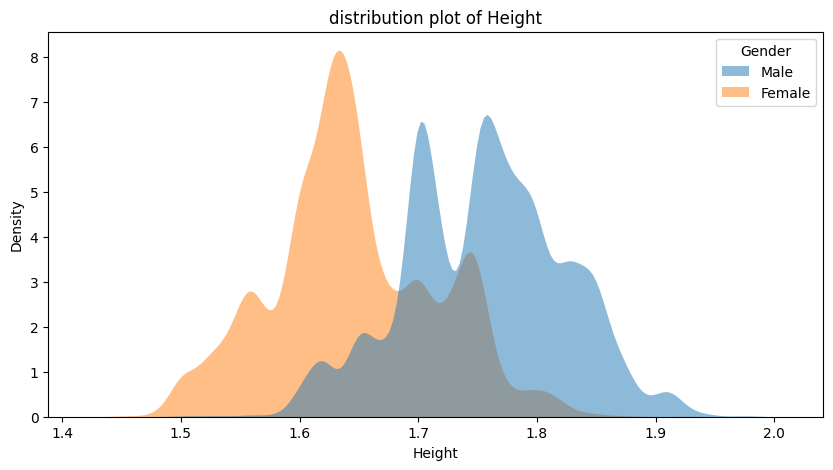

In [30]:
show_dist('Height')

* Average Height of **females** are approx **1.6**
* Average Height of **males** are approx **1.7**
* Overall data is **normal distributed** with little bit of skewness 

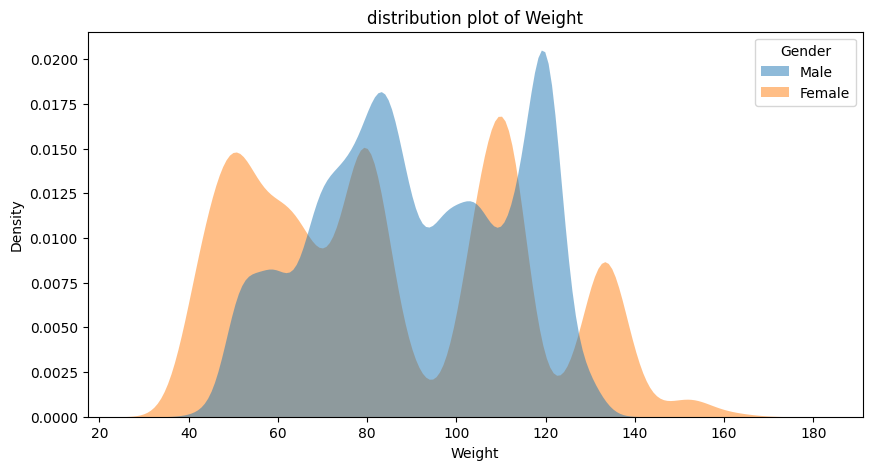

In [31]:
show_dist('Weight')

* Number of **Females** will be more in **Insufficient** and **type 3 obesity**
* Number of male can be more in others type of categories
* Overall data is **normal distributed** with some skewness 

In [32]:
def show_count(columns):
    for feature in columns:
        fig = plt.figure(figsize=(15,6))
        ax = sns.countplot(x=feature,hue='NObeyesdad',data = df, palette='Set2',dodge=True,gap=0.1)
        plt.title(f'Distribution of NObeyesdad across {feature}')
        sns.despine(left=True, bottom=False)
        plt.xlabel('')
        plt.ylabel('')
        plt.yticks([])
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points')
        plt.show()

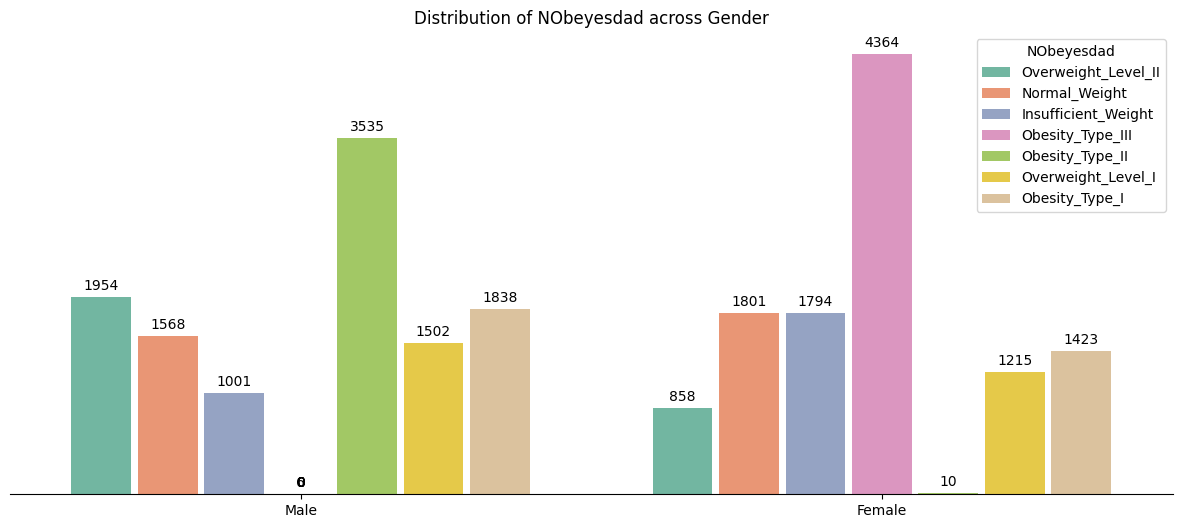

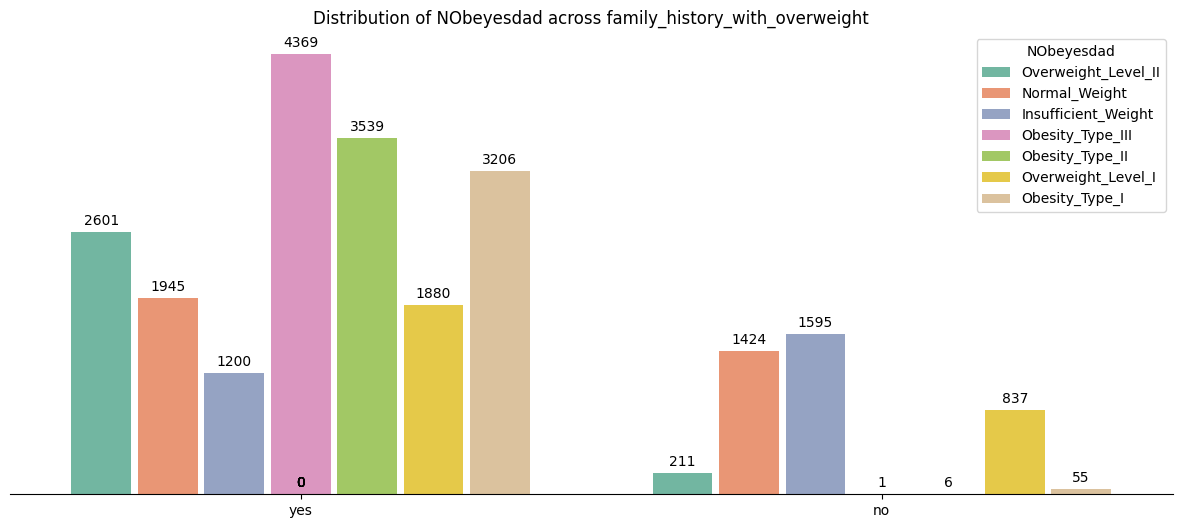

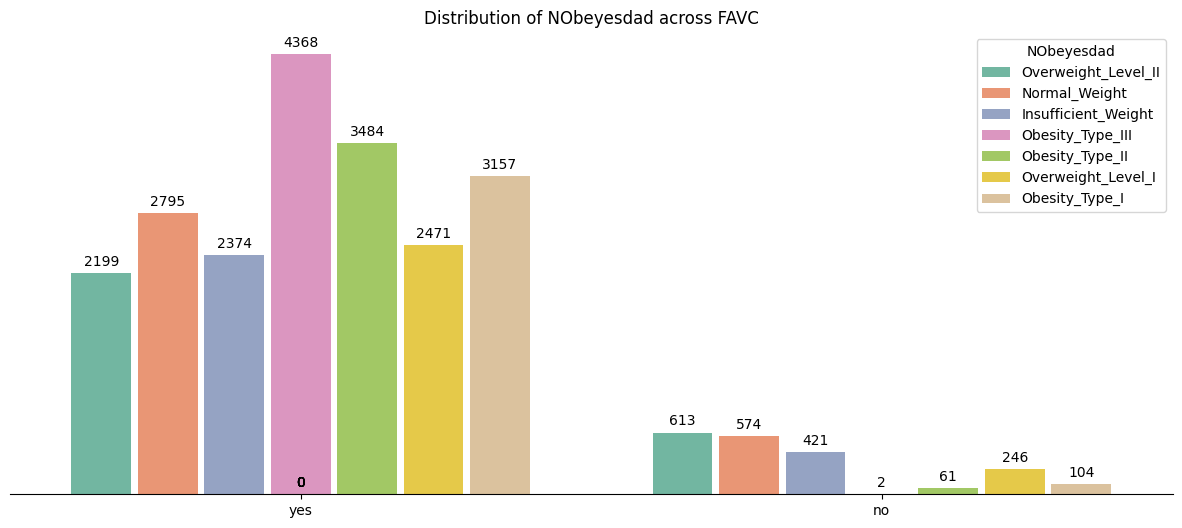

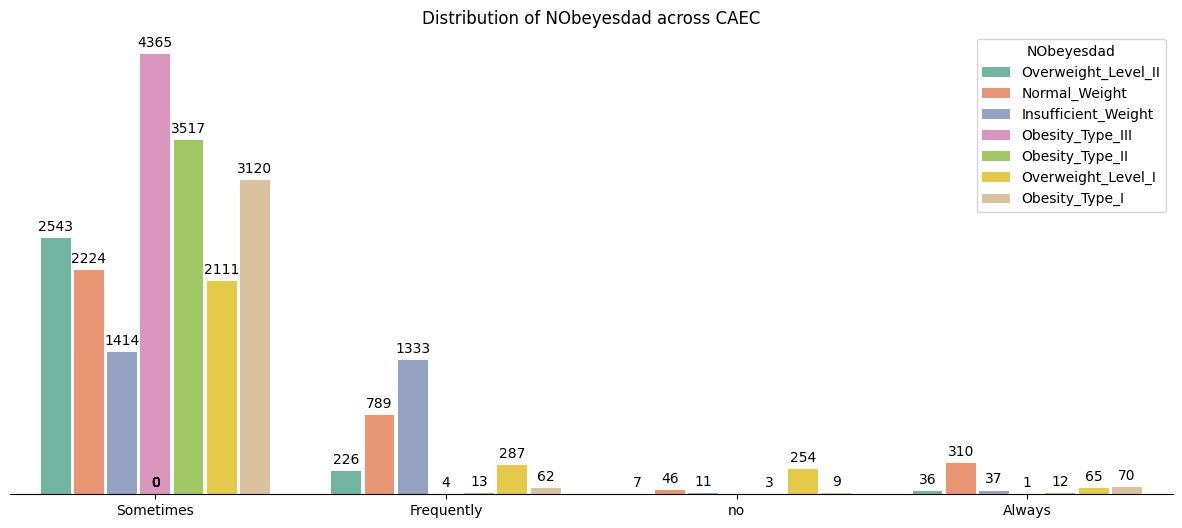

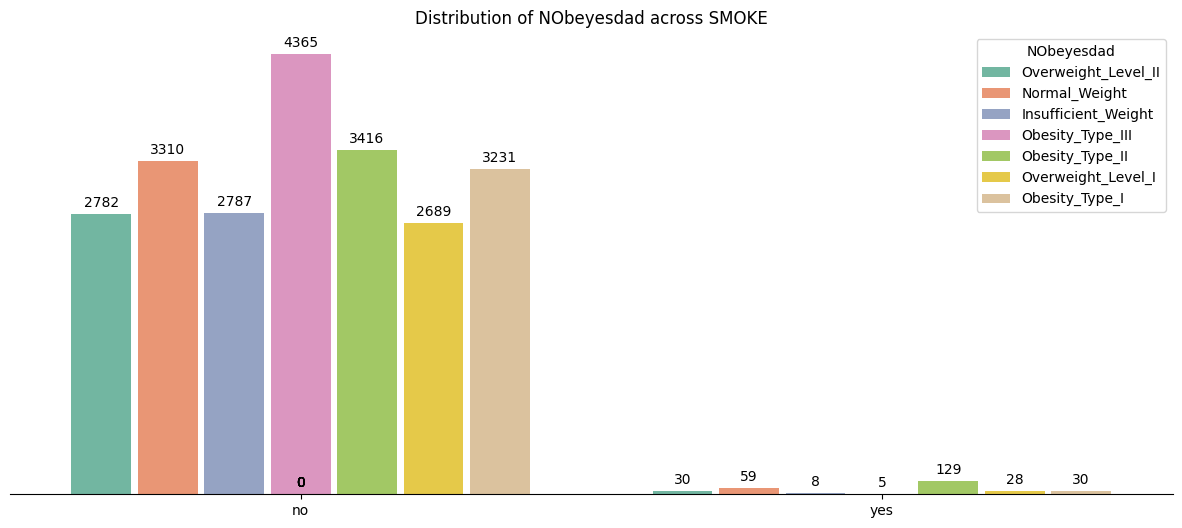

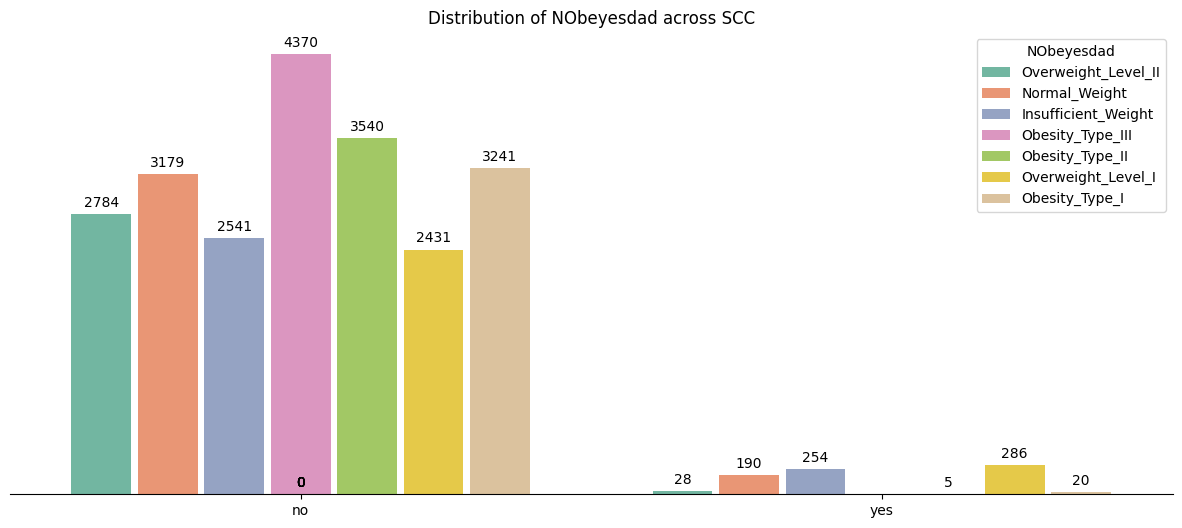

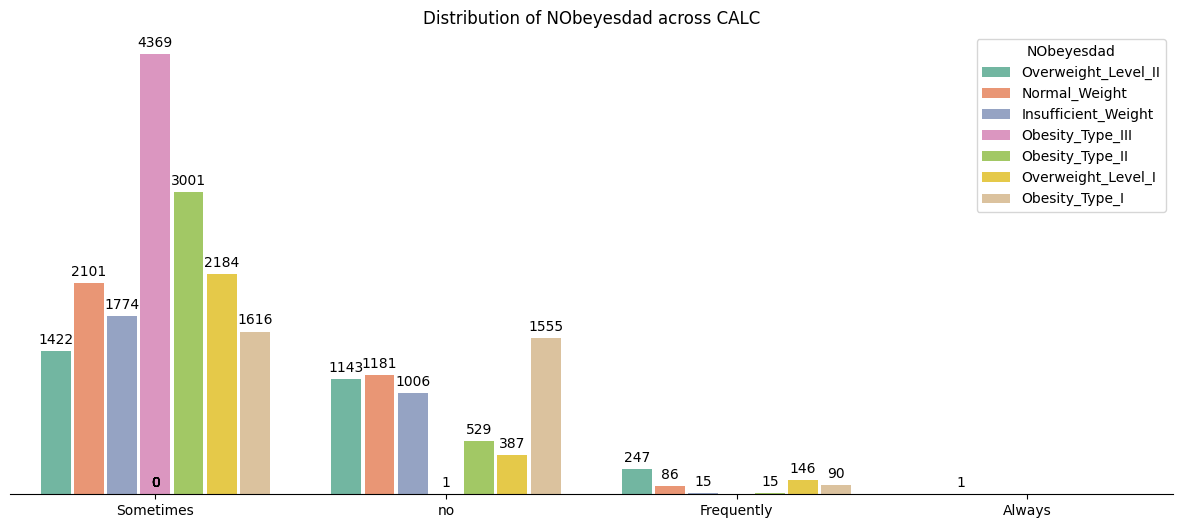

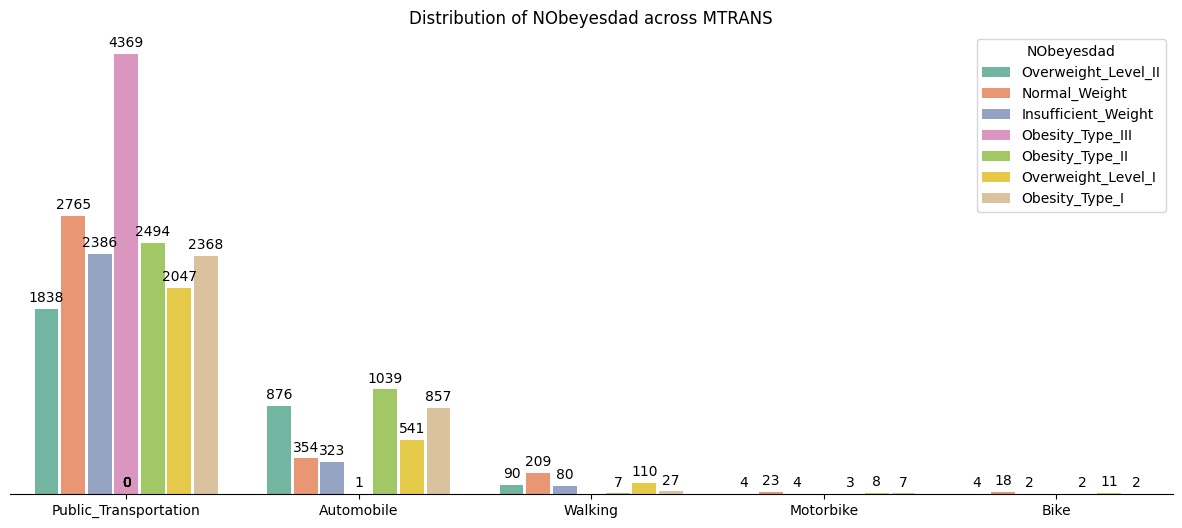

In [33]:
show_count(cat_columns)

* Number of **Female** is higher in **Insufficient_Weight** and **Obesity_Type_III** category, Number of male is higher in **Obesity_Type_II**
* People with some **family_history_with_overweight** are more chances of obesty, Number of people of with no **family_history_with_overweight** are more in **Insufficient_Weight**
* Since majorty of people are using **Public_Transport** so the no of **Type 3 Obesity** is more where as there are very few people prefer walking and people using either **motorbike** ore **bike** are even much less.

### 3. Multivariate Analysis 